In [1]:
##########################################################################
# Created on Sat Nov 03 23:17:45 2021                                    #
# Python for Financial Analysis and Risk Management                      #
# @author: Meng Lipeng (FRM, CFA)                                        #
##########################################################################

# 7.2.2.Bond price based on single discount

## 1.Price model of zero coupon bond

$$B=Me^{-yT}$$\
where, 
B:bond price\
M:face value\
y:discount rate(continuous compound)\
T:time to maturity

## 2.Price model of coupon bond

$$B=\frac{C}{m}\times M\times \sum_{i=1}^{N}e^{-yt_i}+Me^{-yt_N}=(\frac{C}{m}\sum_{i=1}^{N}e^{-yt_i}+e^{-yt_N})M$$
where, B:bond price\
C:coupon rate\
m:payment frequency per year(m>=1)\
M:face value\
y:discount rate(continuous compound)\
$t_i$:time to coupon payment date(i=1,2,....,N)\
$t_N$:time to maturity


In [1]:
import numpy as np
def Bondprice_onediscount(C,M,m,y,t):
    '''Define a function to calculating bond price based on single discount rate
    C:coupon rate. 0 indicates zero coupon
    M:face value of bond
    m:payment frequency per year
    y:discount rate
    t:array of time to coupon payment. Single number indicates zero coupon'''
    if C==0:
        price=np.exp(-y*t)*M
    else:
        coupon=np.ones_like(t)*M*C/m
        NPV_coupon=np.sum(coupon*np.exp(-y*t))
        NPV_par=M*np.exp(-y*t[-1])
        price=NPV_coupon+NPV_par
    return price

In [2]:
C_TB2027=0
par=100
T_TB2027=0.5
m_TB2027=0
y_TB2027=0.01954

value_TB2027=Bondprice_onediscount(C=C_TB2027,M=par,m=m_TB2027,y=y_TB2027,t=T_TB2027)
print('Bond price of 2027 on 2020/06/08 is ',round(value_TB2027,4))

Bond price of 2027 on 2020/06/08 is  99.0278


In [3]:
C_TB2006=0.0268
T_TB2006=10
m_TB2006=2
y_TB2006=0.02634

Tlist_TB2006=np.arange(1,m_TB2006*T_TB2006+1)/m_TB2006

value_TB2006=Bondprice_onediscount(C=C_TB2006,M=par,m=m_TB2006,y=y_TB2006,t=Tlist_TB2006)
print('Bond price of 2006 on 2020/05/21 is ',round(value_TB2006,4))

Bond price of 2006 on 2020/05/21 is  100.2496


# 7.2.3.Bond YTM

Zero coupon bond YTM\
$y=\frac{1}{T}\ln{\frac{M}{B}}$\
whereas for coupon bond, we use fsolve function of optimize which is a sub module of Scipy 

In [4]:
def YTM(P,C,M,m,t):
    '''Define a function for calculating bond YTM
    P:bond price observed in market
    C:coupon rate. 0 indicates zero coupon
    M:face value of bond
    m:payment frequency per year
    t:array of time to coupon payment. Single number indicates zero coupon'''
    import scipy.optimize as so
    def f(y):
        coupon=np.ones_like(t)*M*C/m
        NPV_coupon=np.sum(coupon*np.exp(-y*t))
        NPV_par=M*np.exp(-y*t[-1])
        value=NPV_coupon+NPV_par
        return value-P
    if C==0:
        y=(np.log(M/P))/t
    else:
        y=so.fsolve(func=f,x0=0.1)#the second parameter is initial value
    return y

In [5]:
P_TB0911=104.802
C_TB0911=0.0369
m_TB0911=2
T_TB0911=4

Tlist_TB0911=np.arange(1,m_TB0911*T_TB0911+1)/m_TB0911

Bond_yield=YTM(P=P_TB0911,C=C_TB0911,M=par,m=m_TB0911,t=Tlist_TB0911)
Bond_yield=float(Bond_yield)
print('YTM of 0911 at 2020/06/11 is ',round(Bond_yield,6))

YTM of 0911 at 2020/06/11 is  0.024086


In [6]:
#Calibration
price=Bondprice_onediscount(C=C_TB0911,M=par,m=m_TB0911,y=Bond_yield,t=Tlist_TB0911)
print('Price of 0911 at 2020/06/11 is ',round(price,4))

Price of 0911 at 2020/06/11 is  104.802


# 7.2.4.Bond price based on multiple term discount

## 1.Price model of zero coupon bond

$$B=Me^{-y_TT}$$\
where, 
B:bond price\
M:face value\
$y_T$:discount rate of term T(continuous compound)\
T:time to maturity

## 2.Price model of coupon bond

$$B=(\frac{C}{m}\sum_{i=1}^{N}e^{-y_it_i}+e^{-y_Nt_N})M$$
where, B:bond price\
C:coupon rate\
m:payment frequency per year(m>=1)\
M:face value\
$y_i$:discount rate of term $t_i$(continuous compound)\
$t_i$:time to coupon payment date(i=1,2,....,N)\
$t_N$:time to maturity


In [7]:
def Bondprice_deffdiscount(C,M,m,y,t):
    '''Define a function to calculating bond price based on multiple term discount rate
    C:coupon rate. 0 indicates zero coupon
    M:face value of bond
    m:payment frequency per year
    y:array of discount rate in different term. Single number indicates zero coupon
    t:array of time to coupon payment. Single number indicates zero coupon'''
    if C==0:
        price=np.exp(-y*t)*M
    else:
        coupon=np.ones_like(y)*M*C/m
        NPV_coupon=np.sum(coupon*np.exp(-y*t))
        NPV_par=M*np.exp(-y[-1]*t[-1])
        price=NPV_coupon+NPV_par
    return price

# 7.2.5.Bootstrap method to calculate zero rate

Bond | Term/Year | Coupon        | Price   | Par  
:---:| :----:    | :----:        | :----:  | :----:  
1    | 0.25      | 0             | 99.5508 | 100 
2    | 0.5       | 0             | 99.0276 | 100
3    | 1.0       | 2.58%(Once/y) | 100.8104| 100
4    | 1.5       | 3.57%(Twice/y)| 102.1440| 100
5    | 2         | 3.36%(Twice/y) | 102.2541| 100

In [9]:
P=np.array([99.5508,99.0276,100.8104,102.1440,102.2541])
T=np.array([0.25,0.5,1.0,1.5,2.0])
C=np.array([0,0,0.0258,0.0357,0.0336])
m=2

def f(R):
    from numpy import exp
    R1,R2,R3,R4,R5=R
    B1=P[0]*exp(R1*T[0])-par
    B2=P[1]*exp(R2*T[1])-par
    B3=P[2]*exp(R3*T[2])-par*(1+C[2])
    B4=par*(C[3]*exp(-R2*T[1])/m+C[3]*exp(-R3*T[2])/m+(1+C[3]/m)*exp(-R4*T[3]))-P[3]
    B5=par*(C[-1]*exp(-R2*T[1])/m+C[-1]*exp(-R3*T[2])/m+C[-1]*exp(-R4*T[3])/m+(1+C[-1]/m)*exp(-R5*T[-1]))-P[-1]
    return np.array([B1,B2,B3,B4,B5])

import scipy.optimize as so

r0=[0.1,0.1,0.1,0.1,0.1]
rates=so.fsolve(func=f,x0=r0)

print('zero rate(continuous compound) of 0.25y is ',round(rates[0],6))
print('zero rate(continuous compound) of 0.5y is ',round(rates[1],6))
print('zero rate(continuous compound) of 1y is ',round(rates[2],6))
print('zero rate(continuous compound) of 1.5y is ',round(rates[3],6))
print('zero rate(continuous compound) of 2y is ',round(rates[4],6))

zero rate(continuous compound) of 0.25y is  0.018008
zero rate(continuous compound) of 0.5y is  0.019543
zero rate(continuous compound) of 1y is  0.017401
zero rate(continuous compound) of 1.5y is  0.021045
zero rate(continuous compound) of 2y is  0.021956


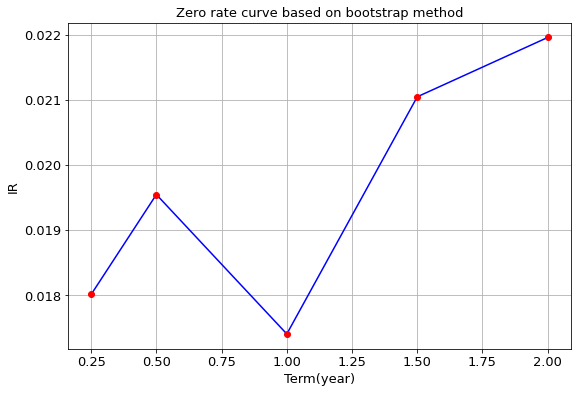

In [11]:
import matplotlib.pyplot as plt

plt.figure(figsize=(9,6))
plt.plot(T,rates,'b-')
plt.plot(T,rates,'ro')
plt.xlabel('Term(year)',fontsize=13)
plt.xticks(fontsize=13)
plt.ylabel('IR',fontsize=13)
plt.yticks(fontsize=13)
plt.title('Zero rate curve based on bootstrap method',fontsize=13)
plt.grid()
plt.show()

## Interpolation

In [15]:
import scipy.interpolate as si

func=si.interp1d(x=T,y=rates,kind='cubic')
T_new=np.array([0.25,0.5,0.75,1.0,1.25,1.5,1.75,2.0])

rates_new=func(T_new)

for i in range(len(T_new)):
    print(T_new[i], 'y\'s zero rate is ',round(rates_new[i],6))

0.25 y's zero rate is  0.018008
0.5 y's zero rate is  0.019543
0.75 y's zero rate is  0.018391
1.0 y's zero rate is  0.017401
1.25 y's zero rate is  0.018641
1.5 y's zero rate is  0.021045
1.75 y's zero rate is  0.022765
2.0 y's zero rate is  0.021956


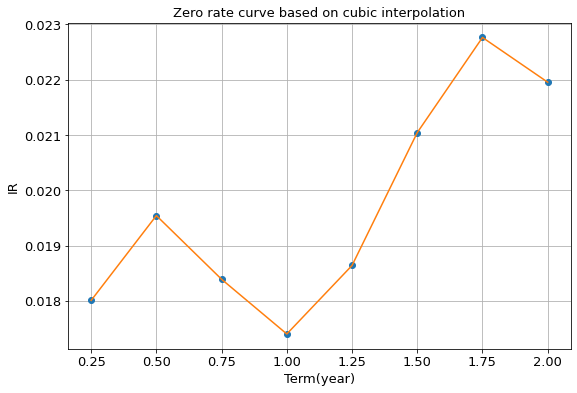

In [16]:
plt.figure(figsize=(9,6))
plt.plot(T_new,rates_new,'o')
plt.plot(T_new,rates_new,'-')
plt.xlabel('Term(year)',fontsize=13)
plt.xticks(fontsize=13)
plt.ylabel('IR',fontsize=13)
plt.yticks(fontsize=13)
plt.title('Zero rate curve based on cubic interpolation',fontsize=13)
plt.grid()
plt.show()

# 7.2.6.Bond price based on zero rate

In [17]:
C_new=0.036
m_new=4

price_new=Bondprice_deffdiscount(C=C_new,M=par,m=m_new,y=rates_new,t=T_new)
print('Bond price based on different term zero rate is ',round(price_new,4))

Bond price based on different term zero rate is  102.7406
